In [55]:
from GPA import GPA
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from glob import glob

In [2]:
fmfiles = glob("Fundamental/*.csv")
fmfiles = np.sort(fmfiles)
fmfiles

array(['Fundamental/a.sorvedouro.csv', 'Fundamental/b.fonte.csv',
       'Fundamental/c.asymm.diag-.csv', 'Fundamental/d.asymm.diag+.csv',
       'Fundamental/e.asymm.diag++.csv', 'Fundamental/f.assym.vert-.csv',
       'Fundamental/g.assym.vert+.csv', 'Fundamental/h.assym.vert++.csv',
       'Fundamental/i.laminar.csv',
       'Fundamental/j.laminar.contaminado.csv',
       'Fundamental/k.random.permutation.csv',
       'Fundamental/l.random.permutation.2.csv'], dtype='<U38')

In [9]:
matrices = [pd.read_csv(f,header=None,  index_col=False).values.astype(float) for f in fmfiles]

In [17]:
ga = GPA(0.0)
gms = [ga(m,moment=["G1_Classic","G1","G2","G3","G4"]) for m in matrices]
gms = pd.DataFrame(gms)
gms

,G1_Classic,G1,G2,G3,G4
0,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j
1,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j
2,0.400000,0.323185,0.812282,0.510557,1.022744+0.605740j
3,0.800000,0.386390,0.812282,0.610557,0.687840-0.007168j
4,0.000000,0.779137,0.336396,0.466667,0.753675-0.872938j
5,0.000000,0.000000,0.336735,0.380952,0.239835+0.897598j
6,0.000000,0.000000,0.166667,0.166667,-0.636514+3.141593j
7,0.000000,0.000000,0.214286,0.380952,-1.098612+3.141593j
8,0.777778,0.195262,0.500000,0.758784,1.879772+1.689487j
9,1.000000,0.280252,0.769850,0.710686,1.341395+0.641272j


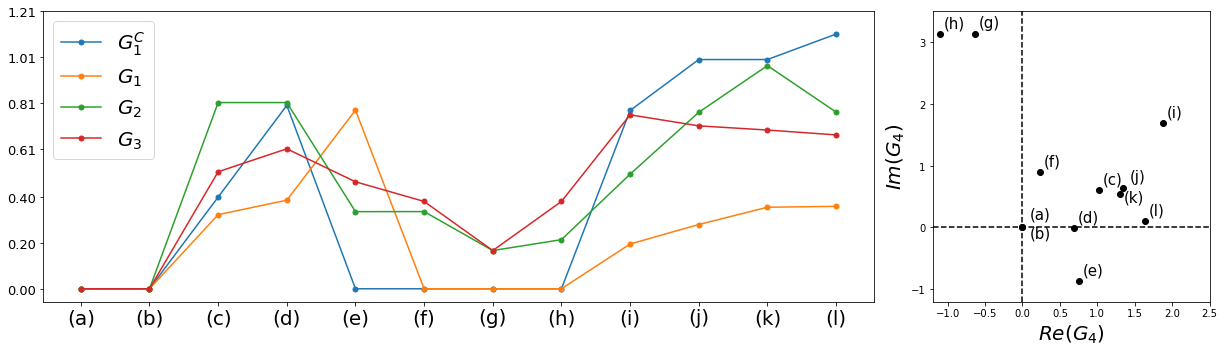

In [208]:
gs = GridSpec(1,2,width_ratios=[3,1])
labels = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]

plt.figure(figsize =(17,5))
plt.subplot(gs[0,0])
plt.plot(gms["G1_Classic"],marker='.',markersize=10,label=r'$G_1^C$')
plt.plot(gms["G1"],marker='.',markersize=10,label=r'$G_1$')
plt.plot(gms["G2"],marker='.',markersize=10,label=r'$G_2$')
plt.plot(gms["G3"],marker='.',markersize=10,label=r'$G_3$')
plt.legend(fontsize=20)
mats = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
plt.yticks(np.round(np.linspace(0.0,np.max(gms["G1_Classic"])+0.1,7),2),fontsize=13)
plt.xticks(np.arange(12),mats,fontsize=20)
#plt.plot(gms["G4"],marker='.',markersize=10)
plt.subplot(gs[0,1])
plt.scatter(np.real(gms["G4"]),np.imag(gms["G4"]),color='k')
plt.ylabel(r"$Im(G_4)$",fontsize = 20)
plt.xlabel(r"$Re(G_4)$",fontsize = 20)

plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')
plt.text(np.real(gms["G4"][0])+0.1,np.imag(gms["G4"][0])+0.14,s=labels[0],fontsize=15)
plt.text(np.real(gms["G4"][1])+0.1,np.imag(gms["G4"][1])-0.17,s=labels[1],fontsize=15)
plt.text(np.real(gms["G4"][2])+0.05,np.imag(gms["G4"][2])+0.1,s=labels[2],fontsize=15)
plt.text(np.real(gms["G4"][3])+0.05,np.imag(gms["G4"][3])+0.1,s=labels[3],fontsize=15)
plt.text(np.real(gms["G4"][4])+0.05,np.imag(gms["G4"][4])+0.1,s=labels[4],fontsize=15)
plt.text(np.real(gms["G4"][5])+0.05,np.imag(gms["G4"][5])+0.1,s=labels[5],fontsize=15)
plt.text(np.real(gms["G4"][6])+0.05,np.imag(gms["G4"][6])+0.1,s=labels[6],fontsize=15)
plt.text(np.real(gms["G4"][7])+0.05,np.imag(gms["G4"][7])+0.1,s=labels[7],fontsize=15)
plt.text(np.real(gms["G4"][8])+0.05,np.imag(gms["G4"][8])+0.1,s=labels[8],fontsize=15)
plt.text(np.real(gms["G4"][9])+0.09,np.imag(gms["G4"][9])+0.1,s=labels[9],fontsize=15)
plt.text(np.real(gms["G4"][10])+0.05,np.imag(gms["G4"][10])-0.12,s=labels[10],fontsize=15)
plt.text(np.real(gms["G4"][11])+0.05,np.imag(gms["G4"][11])+0.1,s=labels[11],fontsize=15)


plt.xlim(-1.2,2.5)
plt.ylim(-1.2,3.5)
    
plt.tight_layout()
plt.savefig("GPAFundamental.pdf",dpi=300)
plt.show()

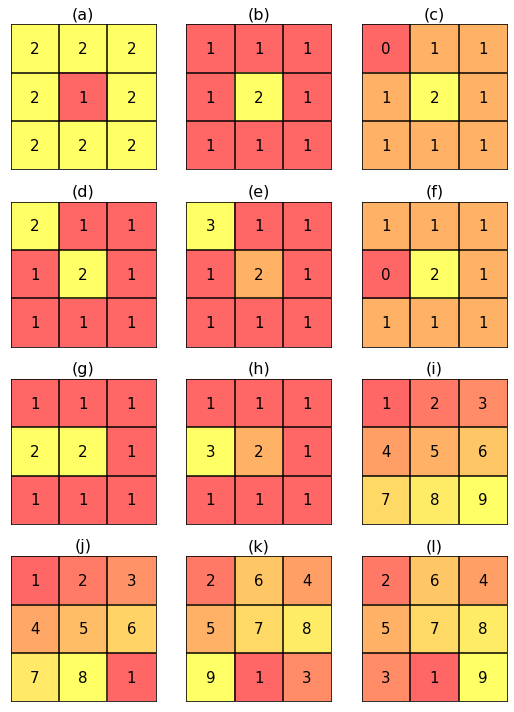

In [209]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(7.5,10))
for i in range(len(matrices)):
    plt.subplot(4,3,i+1)
    plt.imshow(matricesI[i],cmap='autumn',alpha=0.6,origin='upper')
    plt.axhline(1.5,color='k')
    plt.axvline(1.5,color='k')
    plt.axvline(0.5,color='k')
    plt.axhline(0.5,color='k')

    for j in range(3):
        for k in range(3):
            plt.text(j-0.1,k+0.1,str(matricesI[i][k][j]),color='k',fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('MatricesFundamental.pdf',dpi=300)
plt.show()


[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  0.]]
[[ 0.  0.  0.]
 [-1.  0.  1.]
 [ 0.  0.  0.]]


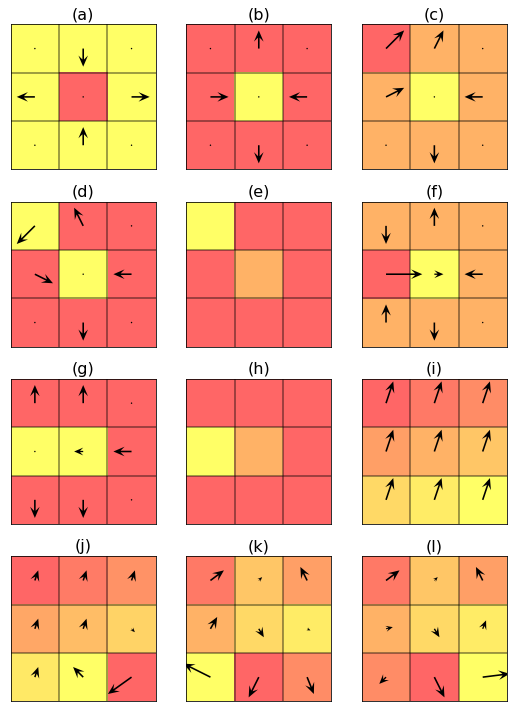

In [210]:
matricesI = [pd.read_csv(f,header=None,  index_col=False).values.astype(int) for f in fmfiles]
plt.figure(figsize=(7.5,10))
for i in range(len(matrices)):
    plt.subplot(4,3,i+1)
    plt.axhline(1.5,color='k',alpha=0.5)
    plt.axvline(1.5,color='k',alpha=0.5)
    plt.axvline(0.5,color='k',alpha=0.5)
    plt.axhline(0.5,color='k',alpha=0.5)
    dx,dy = np.gradient(matricesI[i])
    if(i==0):
        print(dx)
        print(dy)
    
    plt.imshow(matricesI[i],cmap='autumn',alpha=0.6,origin='upper')
    if i<4:
        plt.quiver(dy,dx,width=0.011,headwidth=6,headlength=7,scale=8)
    elif (i>4) & (i<7):
        plt.quiver(dy,dx,width=0.011,headwidth=6,headlength=7,scale=8)
    elif i ==8:
        plt.quiver(dy,dx,width=0.011,headwidth=6,headlength=7,scale=20)
    elif i>8:
        plt.quiver(dy,dx,width=0.011,headwidth=6,headlength=7,scale=43)
    #plt.xlim(-0.8,2.8)
    #plt.ylim(-0.8,2.8)
    
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[i],fontsize=16)
    
plt.tight_layout()
plt.savefig('GradientsFundamental.pdf',dpi=300)
plt.show()
